In [39]:
import pandas as pd
df_1 = pd.read_csv("Datasets/TASK-ML-INTERN.csv")
df_1

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


In [2]:
import numpy as np
import pandas as pd

def msc(input_data):
    """
    Perform Multiplicative Signal Correction (MSC) on the input data.
    Args:
        input_data (pd.DataFrame): Input DataFrame with numeric columns.
    Returns:
        pd.DataFrame: MSC-corrected DataFrame.
    """
    ref_spectrum = np.mean(input_data, axis=0)

    corrected_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        fit = np.polyfit(ref_spectrum, input_data.iloc[i, :], deg=1)
        a, b = fit
        corrected_data[i, :] = (input_data.iloc[i, :] - b) / a

    corrected_df = pd.DataFrame(corrected_data, columns=input_data.columns)
    return corrected_df
df_1.iloc[:, 1:-1] = msc(df_1.iloc[:, 1:-1])
print(df_1.head())

           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.435629  0.414444  0.427745  0.388176  0.401791  0.379987   
1  imagoai_corn_1  0.436666  0.422707  0.422280  0.415160  0.416441  0.408225   
2  imagoai_corn_2  0.465379  0.447263  0.449186  0.449973  0.436943  0.425406   
3  imagoai_corn_3  0.452956  0.457461  0.446953  0.443269  0.445652  0.443767   
4  imagoai_corn_4  0.462015  0.465692  0.448703  0.466043  0.443896  0.431826   

          6         7         8  ...       439       440       441       442  \
0  0.368852  0.355843  0.357471  ...  0.757812  0.765702  0.763068  0.752443   
1  0.393046  0.380020  0.391102  ...  0.728237  0.742652  0.747787  0.741354   
2  0.409314  0.406221  0.404274  ...  0.764335  0.750336  0.744127  0.757330   
3  0.442106  0.411053  0.398434  ...  0.732257  0.720041  0.726145  0.719270   
4  0.438461  0.422104  0.408425  ...  0.730976  0.733588  0.722729  0.724658   

        443       444       445 

In [3]:
# import numpy as np
# import pandas as pd
# import cv2
# 
# def apply_triangle_thresholding(df):
#     df_thresholded = df.copy()
# 
#     for col in df.columns[1:-1]:  # Exclude first and last columns
#         # Normalize the data to 0-255 (OpenCV requires integer input)
#         data = df[col].values
#         data_scaled = cv2.normalize(data, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
# 
#         # Apply Triangle Thresholding
#         _, thresholded = cv2.threshold(data_scaled, 0, 255, cv2.THRESH_TRIANGLE)
# 
#         # Scale back to original range
#         min_val = df[col].min()
#         max_val = df[col].max()
#         df_thresholded[col] = thresholded * (max_val - min_val) / 255 + min_val
# 
#     return df_thresholded
# 
# # Apply thresholding on df_1 (excluding first and last columns)
# df_1.iloc[:, 1:-1] = apply_triangle_thresholding(df_1.iloc[:, 1:-1])
# 
# # Check the result
# print(df_1.head())

In [4]:
# from scipy.signal import savgol_filter
# import pandas as pd
# 
# def apply_savgol_smoothing(df, window_length=11, polyorder=3):
#     df_smoothed = df.copy()
#     for col in df.columns[1:-1]:  # Exclude first and last columns if needed
#         df_smoothed[col] = savgol_filter(df[col], window_length=window_length, polyorder=polyorder)
#     return df_smoothed
# 
# # Example Usage:
# # Apply smoothing to df_1
# df_1.iloc[:, 1:-1] = apply_savgol_smoothing(df_1.iloc[:, 1:-1])
# 
# # Check the result
# print(df_1.head())


In [5]:
df_1.columns

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)

In [6]:
target_variable = df_1["vomitoxin_ppb"]

In [7]:
missing_values = df_1.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [8]:
nan_values = df_1.isna().sum()
nan_values[nan_values > 0]

Series([], dtype: int64)

In [9]:
import numpy as np
df_1.replace([np.inf, -np.inf], np.nan, inplace=True)
infinite_values = (df_1 == np.inf).sum() + (df_1 == -np.inf).sum()
print(infinite_values)

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


In [10]:
nan_values = df_1.isna().sum()
nan_values[nan_values > 0]

Series([], dtype: int64)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")
x = df_1.iloc[:, :-1]
y = df_1.iloc[:, -1]

In [12]:
x

,hsi_id,0,1,2,3,4,5,6,7,8,...,438,439,440,441,442,443,444,445,446,447
0,imagoai_corn_0,0.435629,0.414444,0.427745,0.388176,0.401791,0.379987,0.368852,0.355843,0.357471,...,0.725607,0.757812,0.765702,0.763068,0.752443,0.742925,0.738655,0.759005,0.744008,0.751502
1,imagoai_corn_1,0.436666,0.422707,0.422280,0.415160,0.416441,0.408225,0.393046,0.380020,0.391102,...,0.747358,0.728237,0.742652,0.747787,0.741354,0.746718,0.721070,0.742271,0.741861,0.733719
2,imagoai_corn_2,0.465379,0.447263,0.449186,0.449973,0.436943,0.425406,0.409314,0.406221,0.404274,...,0.752485,0.764335,0.750336,0.744127,0.757330,0.757763,0.736777,0.739822,0.752068,0.746157
3,imagoai_corn_3,0.452956,0.457461,0.446953,0.443269,0.445652,0.443767,0.442106,0.411053,0.398434,...,0.717786,0.732257,0.720041,0.726145,0.719270,0.741082,0.727888,0.731914,0.744364,0.722768
4,imagoai_corn_4,0.462015,0.465692,0.448703,0.466043,0.443896,0.431826,0.438461,0.422104,0.408425,...,0.739383,0.730976,0.733588,0.722729,0.724658,0.723707,0.706398,0.735907,0.721792,0.713876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.486558,0.453317,0.451452,0.446922,0.438345,0.423303,0.427708,0.430272,0.423353,...,0.743327,0.749432,0.732548,0.719327,0.741088,0.726986,0.722753,0.742383,0.741886,0.724073
496,imagoai_corn_496,0.459521,0.443160,0.426482,0.420929,0.387791,0.397464,0.404858,0.384221,0.394613,...,0.723686,0.755382,0.742694,0.745577,0.741987,0.725918,0.728442,0.740124,0.728692,0.728730
497,imagoai_corn_497,0.451581,0.465413,0.464297,0.471717,0.454268,0.424362,0.429029,0.429594,0.410699,...,0.729586,0.732020,0.725326,0.714159,0.717001,0.716543,0.707733,0.715978,0.709466,0.741016
498,imagoai_corn_498,0.443909,0.477956,0.468262,0.432753,0.466829,0.441277,0.441000,0.426766,0.431332,...,0.726550,0.717306,0.737489,0.729925,0.739666,0.738871,0.708352,0.731345,0.727440,0.734168


In [13]:
x

,hsi_id,0,1,2,3,4,5,6,7,8,...,438,439,440,441,442,443,444,445,446,447
0,imagoai_corn_0,0.435629,0.414444,0.427745,0.388176,0.401791,0.379987,0.368852,0.355843,0.357471,...,0.725607,0.757812,0.765702,0.763068,0.752443,0.742925,0.738655,0.759005,0.744008,0.751502
1,imagoai_corn_1,0.436666,0.422707,0.422280,0.415160,0.416441,0.408225,0.393046,0.380020,0.391102,...,0.747358,0.728237,0.742652,0.747787,0.741354,0.746718,0.721070,0.742271,0.741861,0.733719
2,imagoai_corn_2,0.465379,0.447263,0.449186,0.449973,0.436943,0.425406,0.409314,0.406221,0.404274,...,0.752485,0.764335,0.750336,0.744127,0.757330,0.757763,0.736777,0.739822,0.752068,0.746157
3,imagoai_corn_3,0.452956,0.457461,0.446953,0.443269,0.445652,0.443767,0.442106,0.411053,0.398434,...,0.717786,0.732257,0.720041,0.726145,0.719270,0.741082,0.727888,0.731914,0.744364,0.722768
4,imagoai_corn_4,0.462015,0.465692,0.448703,0.466043,0.443896,0.431826,0.438461,0.422104,0.408425,...,0.739383,0.730976,0.733588,0.722729,0.724658,0.723707,0.706398,0.735907,0.721792,0.713876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.486558,0.453317,0.451452,0.446922,0.438345,0.423303,0.427708,0.430272,0.423353,...,0.743327,0.749432,0.732548,0.719327,0.741088,0.726986,0.722753,0.742383,0.741886,0.724073
496,imagoai_corn_496,0.459521,0.443160,0.426482,0.420929,0.387791,0.397464,0.404858,0.384221,0.394613,...,0.723686,0.755382,0.742694,0.745577,0.741987,0.725918,0.728442,0.740124,0.728692,0.728730
497,imagoai_corn_497,0.451581,0.465413,0.464297,0.471717,0.454268,0.424362,0.429029,0.429594,0.410699,...,0.729586,0.732020,0.725326,0.714159,0.717001,0.716543,0.707733,0.715978,0.709466,0.741016
498,imagoai_corn_498,0.443909,0.477956,0.468262,0.432753,0.466829,0.441277,0.441000,0.426766,0.431332,...,0.726550,0.717306,0.737489,0.729925,0.739666,0.738871,0.708352,0.731345,0.727440,0.734168


In [14]:

y

0      1100.0
1      1000.0
2      1300.0
3      1300.0
4       220.0
        ...  
495    1200.0
496       0.0
497       0.0
498       0.0
499    1400.0
Name: vomitoxin_ppb, Length: 500, dtype: float64

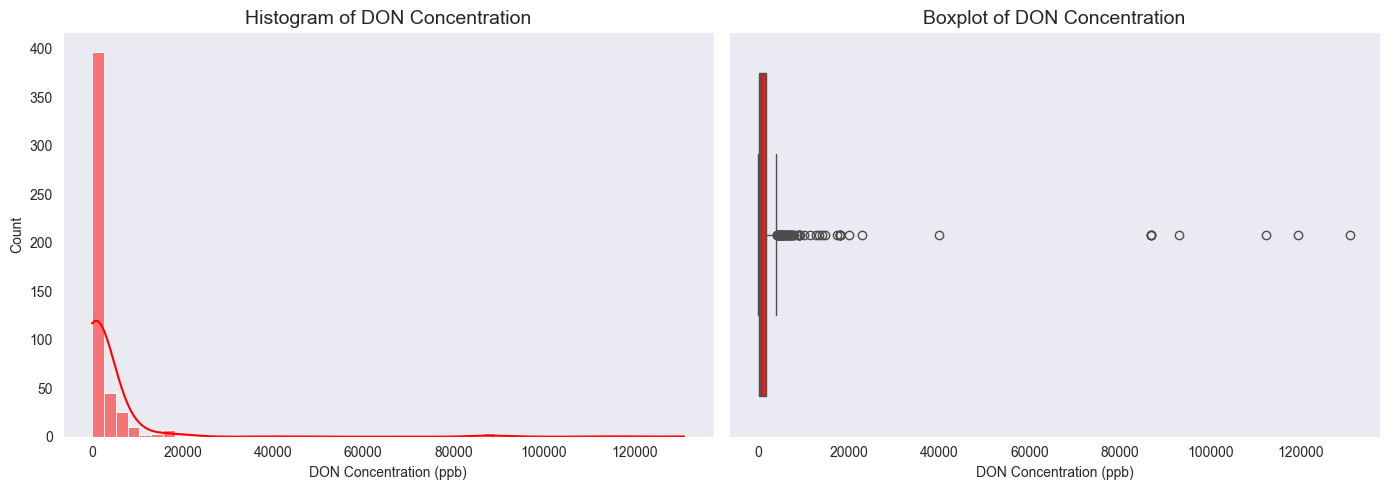

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(df_1["vomitoxin_ppb"], bins=50, kde=True, ax=axes[0], color="red")
axes[0].set_title("Histogram of DON Concentration", fontsize=14)
axes[0].set_xlabel("DON Concentration (ppb)")

# Boxplot
sns.boxplot(x=df_1["vomitoxin_ppb"], ax=axes[1], color="red")
axes[1].set_title("Boxplot of DON Concentration", fontsize=14)
axes[1].set_xlabel("DON Concentration (ppb)")

plt.tight_layout()
plt.show()

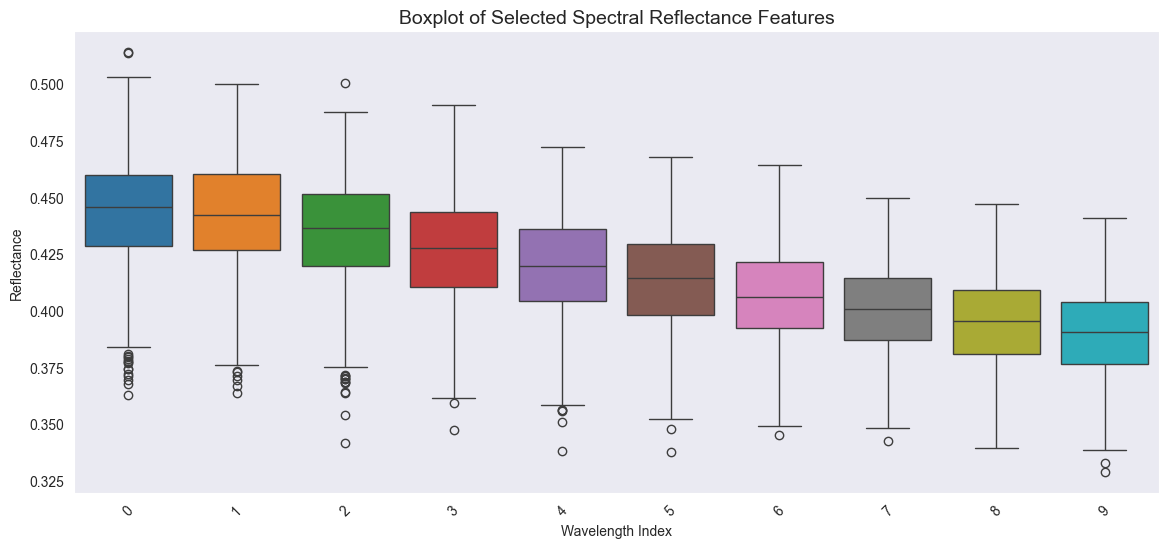

In [16]:
selected_wavelengths = df_1.columns[1:11]  #Visualizing all 448 columns is not practical we will work our way through

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_1[selected_wavelengths])
plt.xticks(rotation=45)
plt.title("Boxplot of Selected Spectral Reflectance Features", fontsize=14)
plt.xlabel("Wavelength Index")
plt.ylabel("Reflectance")
plt.show()

In [17]:
Q1 = df_1.iloc[:, 1:-1].quantile(0.25)
Q3 = df_1.iloc[:, 1:-1].quantile(0.75)
IQR = Q3 - Q1
outlier_counts = ((df_1.iloc[:, 1:-1] < (Q1 - 1.5 * IQR)) | (df_1.iloc[:, 1:-1] > (Q3 + 1.5 * IQR))).sum()
print(outlier_counts[outlier_counts > 0])

0      16
1       6
2      14
3       2
4       5
       ..
443    20
444    27
445    19
446    30
447    21
Length: 444, dtype: int64


In [18]:
print(df_1.dtypes)

hsi_id            object
0                float64
1                float64
2                float64
3                float64
                  ...   
444              float64
445              float64
446              float64
447              float64
vomitoxin_ppb    float64
Length: 450, dtype: object


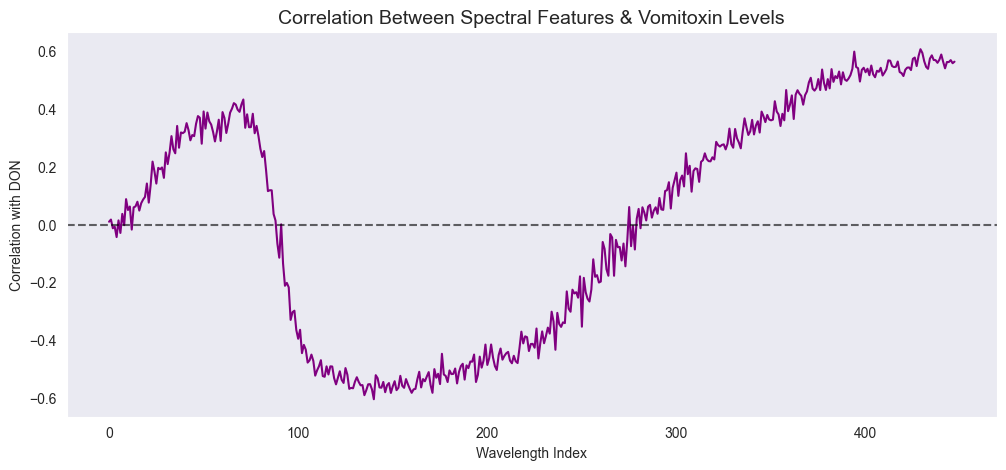

In [19]:
corr_values = df_1.iloc[:, 1:-1].corrwith(df_1["vomitoxin_ppb"])

# Plot correlation
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(len(corr_values)), y=corr_values, color="purple")
plt.title("Correlation Between Spectral Features & Vomitoxin Levels", fontsize=14)
plt.xlabel("Wavelength Index")
plt.ylabel("Correlation with DON")
plt.axhline(0, color="black", linestyle="--", alpha=0.6)
plt.show()

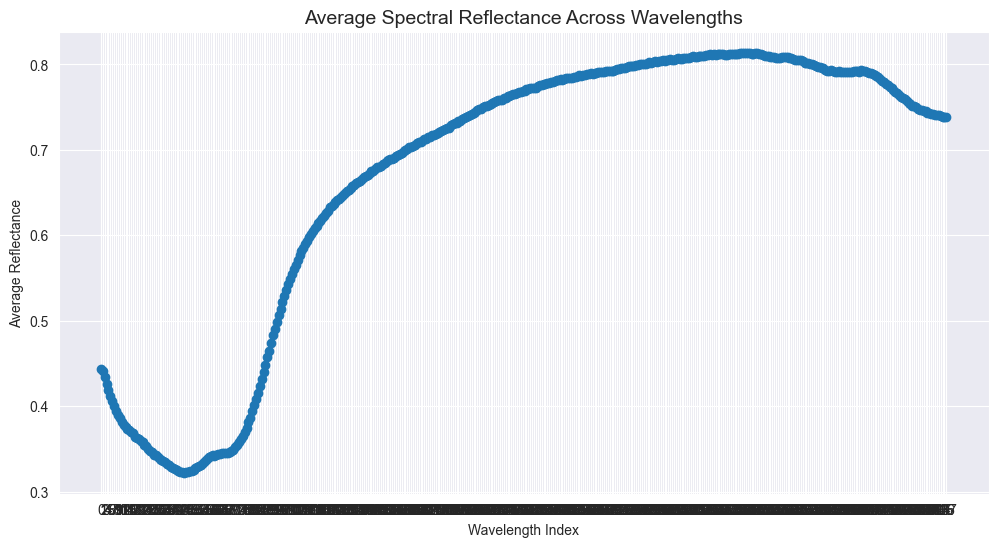

In [20]:
#Line Plot: Average Reflectance Across Wavelengths
spectral_columns = df_1.columns[1:-1]  
mean_reflectance = df_1[spectral_columns].mean()
plt.figure(figsize=(12, 6))
plt.plot(mean_reflectance.index, mean_reflectance.values, marker='o', linestyle='-')
plt.xlabel("Wavelength Index")
plt.ylabel("Average Reflectance")
plt.title("Average Spectral Reflectance Across Wavelengths", fontsize=14)
plt.grid()
plt.show()

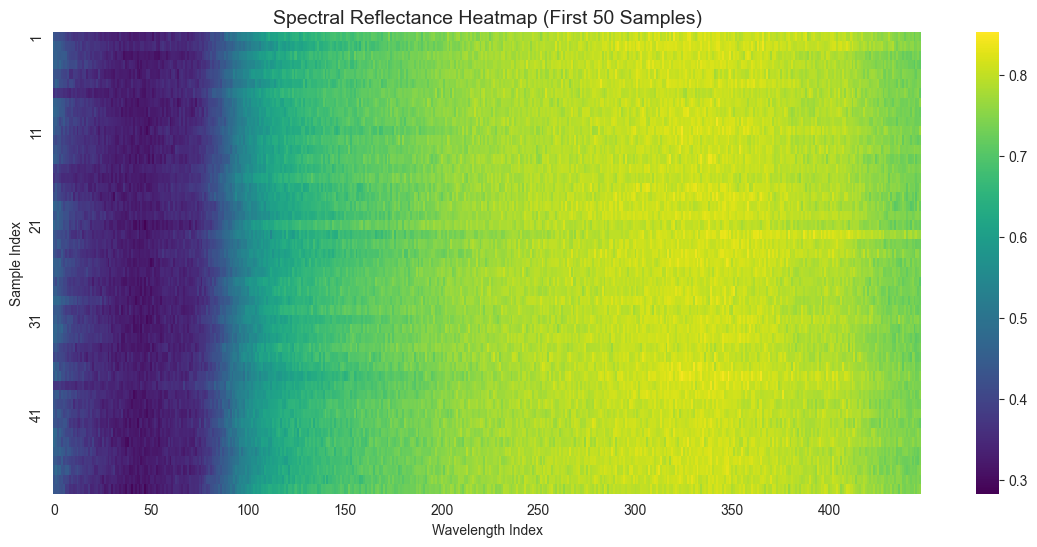

In [21]:
#Line Plot: Average Reflectance Across Wavelengths we will take 50 features to avoid overload our visualization
sample_subset = df_1[spectral_columns].iloc[1:50]
plt.figure(figsize=(14, 6))
sns.heatmap(sample_subset, cmap="viridis", xticklabels=50, yticklabels=10)
plt.xlabel("Wavelength Index")
plt.ylabel("Sample Index")
plt.title("Spectral Reflectance Heatmap (First 50 Samples)", fontsize=14)
plt.show()

In [22]:
#lets check the outliers once again starting with Target feature
target_col = "vomitoxin_ppb"
Q1 = df_1[target_col].quantile(0.25)
Q3 = df_1[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_1[(df_1[target_col] < lower_bound) | (df_1[target_col] > upper_bound)]
print(f"Number of outliers in target feature: {outliers.shape[0]}")

Number of outliers in target feature: 80


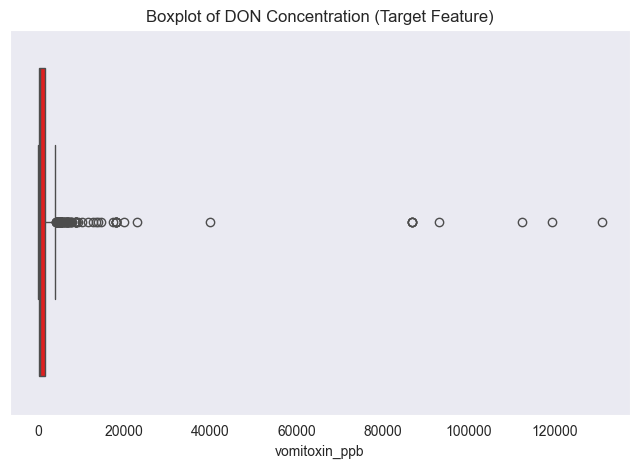

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_1[target_col], color="red")
plt.title("Boxplot of DON Concentration (Target Feature)")
plt.show()

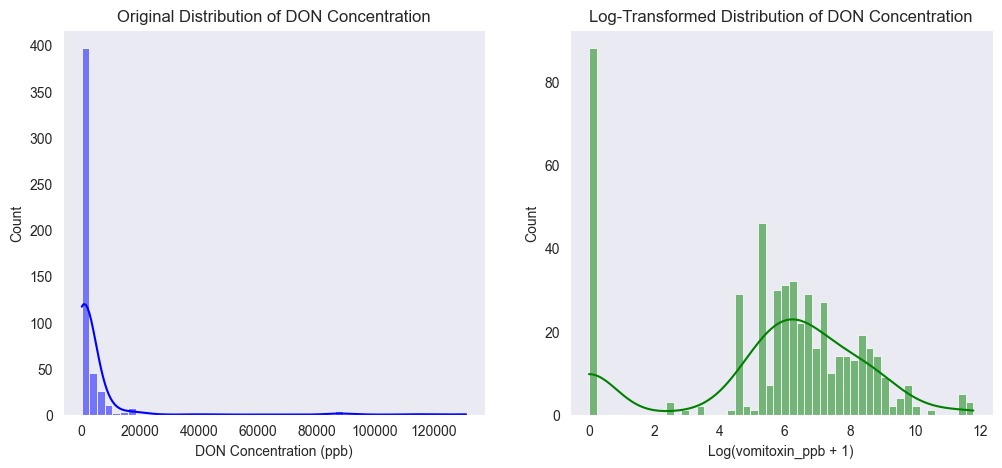

In [24]:
#We can simply remove the outliers but it can also lead to loss of information if some values are valid so to keep the information we will use Log transformation
import numpy as np
df_1["DON_Log"] = np.log1p(df_1["vomitoxin_ppb"] + 1e-5)
plt.figure(figsize=(12, 5))
# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(df_1["vomitoxin_ppb"], bins=50, kde=True, color="blue")
plt.title("Original Distribution of DON Concentration")
plt.xlabel("DON Concentration (ppb)")
# Transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df_1["DON_Log"], bins=50, kde=True, color="green")
plt.title("Log-Transformed Distribution of DON Concentration")
plt.xlabel("Log(vomitoxin_ppb + 1)")
plt.show()

                 0             1             2             3             4  \
mean -8.135714e-16  2.984279e-16 -6.039613e-17 -7.034373e-16 -5.435652e-16   
std   1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   

                 5             6             7             8             9  \
mean  2.447820e-15 -1.346478e-15 -1.222134e-15  9.592327e-17 -5.808687e-16   
std   1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   

      ...           439           440           441           442  \
mean  ...  1.714184e-15  8.650858e-16 -9.201528e-16  4.124701e-15   
std   ...  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   

               443           444           445           446           447  \
mean -3.382183e-15  7.354117e-16  2.842171e-16 -2.984279e-16  3.254286e-15   
std   1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   

      vomitoxin_ppb  
mean   2.131628e-17  
std    1.001002e+00  

[2 rows x 449 column

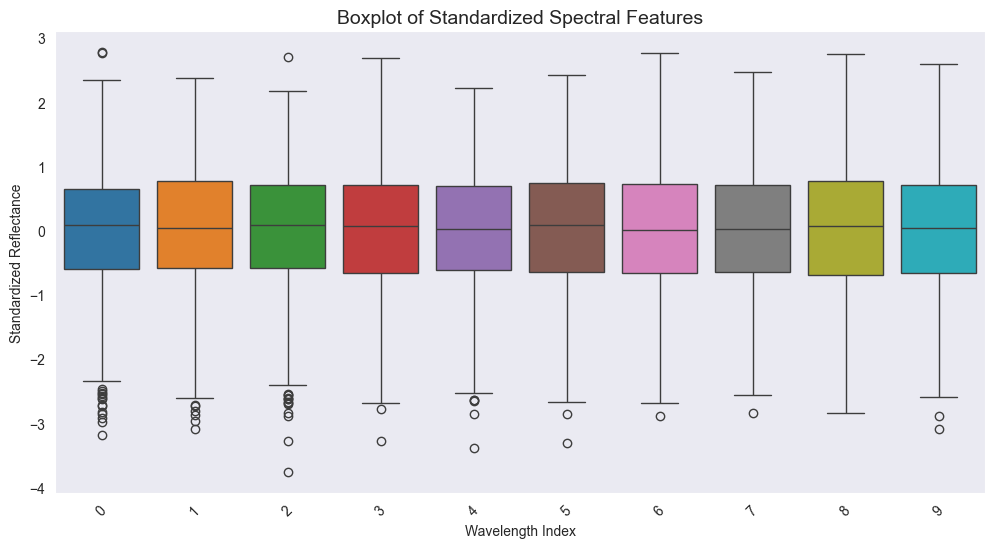

In [25]:
from sklearn.preprocessing import StandardScaler
spectral_features = df_1.columns[1:-1]
scaler = StandardScaler()
df_standardized = df_1.copy()
df_standardized[spectral_features] = scaler.fit_transform(df_1[spectral_features])

# Checking mean and std after standardization
mean_std = df_standardized[spectral_features].agg(["mean", "std"])
print(mean_std)

# Visualizing the standardized data distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_standardized[spectral_features].iloc[:, :10])  # First 10 columns
plt.xticks(rotation=45)
plt.title("Boxplot of Standardized Spectral Features", fontsize=14)
plt.xlabel("Wavelength Index")
plt.ylabel("Standardized Reflectance")
plt.show()

In [26]:
df_1

,hsi_id,0,1,2,3,4,5,6,7,8,...,440,441,442,443,444,445,446,447,vomitoxin_ppb,DON_Log
0,imagoai_corn_0,0.435629,0.414444,0.427745,0.388176,0.401791,0.379987,0.368852,0.355843,0.357471,...,0.765702,0.763068,0.752443,0.742925,0.738655,0.759005,0.744008,0.751502,1100.0,7.003974
1,imagoai_corn_1,0.436666,0.422707,0.422280,0.415160,0.416441,0.408225,0.393046,0.380020,0.391102,...,0.742652,0.747787,0.741354,0.746718,0.721070,0.742271,0.741861,0.733719,1000.0,6.908755
2,imagoai_corn_2,0.465379,0.447263,0.449186,0.449973,0.436943,0.425406,0.409314,0.406221,0.404274,...,0.750336,0.744127,0.757330,0.757763,0.736777,0.739822,0.752068,0.746157,1300.0,7.170888
3,imagoai_corn_3,0.452956,0.457461,0.446953,0.443269,0.445652,0.443767,0.442106,0.411053,0.398434,...,0.720041,0.726145,0.719270,0.741082,0.727888,0.731914,0.744364,0.722768,1300.0,7.170888
4,imagoai_corn_4,0.462015,0.465692,0.448703,0.466043,0.443896,0.431826,0.438461,0.422104,0.408425,...,0.733588,0.722729,0.724658,0.723707,0.706398,0.735907,0.721792,0.713876,220.0,5.398163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.486558,0.453317,0.451452,0.446922,0.438345,0.423303,0.427708,0.430272,0.423353,...,0.732548,0.719327,0.741088,0.726986,0.722753,0.742383,0.741886,0.724073,1200.0,7.090910
496,imagoai_corn_496,0.459521,0.443160,0.426482,0.420929,0.387791,0.397464,0.404858,0.384221,0.394613,...,0.742694,0.745577,0.741987,0.725918,0.728442,0.740124,0.728692,0.728730,0.0,0.000010
497,imagoai_corn_497,0.451581,0.465413,0.464297,0.471717,0.454268,0.424362,0.429029,0.429594,0.410699,...,0.725326,0.714159,0.717001,0.716543,0.707733,0.715978,0.709466,0.741016,0.0,0.000010
498,imagoai_corn_498,0.443909,0.477956,0.468262,0.432753,0.466829,0.441277,0.441000,0.426766,0.431332,...,0.737489,0.729925,0.739666,0.738871,0.708352,0.731345,0.727440,0.734168,0.0,0.000010


In [27]:
target_col = df_1.iloc[:, -1]

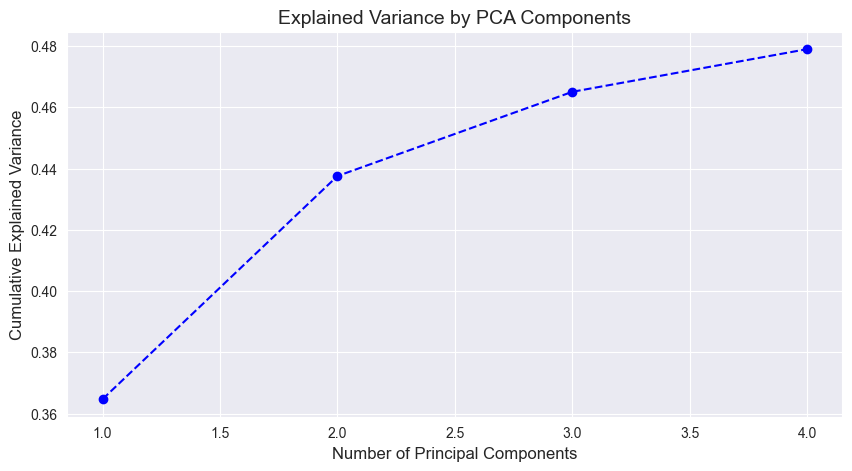

         PC1       PC2       PC3       PC4    Target
0   1.639467 -7.568442  0.830519  1.105022  7.003974
1  -2.619540 -3.106622  0.082333 -0.943346  6.908755
2 -13.142801  6.418091 -3.909310 -3.964636  7.170888
3   7.037341  2.313361  2.524736  3.148044  7.170888
4   1.035692  8.801107 -1.498329  0.358982  5.398163


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = df_1.iloc[:, 1:-1]
target = df_1.iloc[:, -1]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
pca = PCA(n_components=4)
principal_components = pca.fit_transform(features_scaled)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 5), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Explained Variance by PCA Components', fontsize=14)
plt.grid()
plt.show()
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(4)])
pca_df['Target'] = target
print(pca_df.head())

In [29]:
pca_df["Target"] = target

In [30]:
pca_df

,PC1,PC2,PC3,PC4,Target
0,1.639467,-7.568442,0.830519,1.105022,7.003974
1,-2.619540,-3.106622,0.082333,-0.943346,6.908755
2,-13.142801,6.418091,-3.909310,-3.964636,7.170888
3,7.037341,2.313361,2.524736,3.148044,7.170888
4,1.035692,8.801107,-1.498329,0.358982,5.398163
...,...,...,...,...,...
495,1.258505,5.354739,1.252892,-0.301232,7.090910
496,2.167821,-2.467791,-4.060649,-3.034414,0.000010
497,10.047907,6.174288,1.033906,-1.617312,0.000010
498,5.345151,4.734563,3.693331,2.402814,0.000010


In [31]:
pca_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Target'], dtype='object')

In [32]:
from sklearn.model_selection import train_test_split
y = pca_df.Target
x = pca_df.drop(columns=['Target'])

In [33]:
x

,PC1,PC2,PC3,PC4
0,1.639467,-7.568442,0.830519,1.105022
1,-2.619540,-3.106622,0.082333,-0.943346
2,-13.142801,6.418091,-3.909310,-3.964636
3,7.037341,2.313361,2.524736,3.148044
4,1.035692,8.801107,-1.498329,0.358982
...,...,...,...,...
495,1.258505,5.354739,1.252892,-0.301232
496,2.167821,-2.467791,-4.060649,-3.034414
497,10.047907,6.174288,1.033906,-1.617312
498,5.345151,4.734563,3.693331,2.402814


In [34]:
y

0      7.003974
1      6.908755
2      7.170888
3      7.170888
4      5.398163
         ...   
495    7.090910
496    0.000010
497    0.000010
498    0.000010
499    7.244942
Name: Target, Length: 500, dtype: float64

In [35]:
x_train, x_text, y_train, y_text = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
# Regression Models
# Linear Regression (MLR)
# Ridge Regression
# Lasso Regression

# Tree-Based Models
# Decision Trees
# Random Forest
# Gradient Boosting Machines (GBM)
# XGBoost
# LightGBM

# Deep Learning Models
# Convolutional Neural Networks (CNN)
# k-Nearest Neighbors (k-NN)



In [37]:
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff = np.where(denominator == 0, 0, diff)  # Handle division by zero
    return np.mean(diff) * 100
smape_scorer = make_scorer(smape, greater_is_better=False)
X = pca_df.drop(columns=['Target'])
y = pca_df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso_params = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}
lasso = GridSearchCV(Lasso(), param_grid=lasso_params, cv=5, scoring=smape_scorer)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.best_estimator_.predict(X_test)
ridge_params = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}
ridge = GridSearchCV(Ridge(), param_grid=ridge_params, cv=5, scoring=smape_scorer)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.best_estimator_.predict(X_test)

linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred_linear = linear.predict(X_test)

dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt = GridSearchCV(DecisionTreeRegressor(), param_grid=dt_params, cv=5, scoring=smape_scorer)
dt.fit(X_train, y_train)

y_pred_dt = dt.best_estimator_.predict(X_test)
rf_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf = GridSearchCV(RandomForestRegressor(), param_grid=rf_params, cv=5, scoring=smape_scorer)
rf.fit(X_train, y_train)

y_pred_rf = rf.best_estimator_.predict(X_test)
def evaluate_model(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    smape_value = smape(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name} Results:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"SMAPE: {smape_value:.2f}%")
    print(f"R²: {r2:.4f}")

evaluate_model("Lasso Regression", y_test, y_pred_lasso)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Linear Regression", y_test, y_pred_linear)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)

print("\nBest Lasso Parameters:", lasso.best_params_)
print("Best Ridge Parameters:", ridge.best_params_)
print("Best Decision Tree Parameters:", dt.best_params_)
print("Best Random Forest Parameters:", rf.best_params_)


Lasso Regression Results:
MSE: 7.1510
RMSE: 2.6741
MAE: 1.9966
SMAPE: 48.00%
R²: 0.1192

Ridge Regression Results:
MSE: 6.2768
RMSE: 2.5054
MAE: 1.8539
SMAPE: 47.56%
R²: 0.2268

Linear Regression Results:
MSE: 6.2812
RMSE: 2.5062
MAE: 1.8554
SMAPE: 47.61%
R²: 0.2263

Decision Tree Results:
MSE: 6.7909
RMSE: 2.6059
MAE: 2.0321
SMAPE: 52.70%
R²: 0.1635

Random Forest Results:
MSE: 6.1843
RMSE: 2.4868
MAE: 1.8737
SMAPE: 49.59%
R²: 0.2382

Best Lasso Parameters: {'alpha': 10}
Best Ridge Parameters: {'alpha': 100}
Best Decision Tree Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Random Forest Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [38]:
import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff = np.where(denominator == 0, 0, diff)  # Handle division by zero
    return np.mean(diff) * 100

smape_scorer = make_scorer(smape, greater_is_better=False)
X = pca_df.drop(columns=['Target'])
y = pca_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_params = {
    'n_neighbors': [3, 5, 7, 10, 15, 17, 19, 21, 23, 25],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = GridSearchCV(KNeighborsRegressor(), param_grid=knn_params, cv=5, scoring=smape_scorer)
knn.fit(X_train, y_train)
y_pred_knn = knn.best_estimator_.predict(X_test)

def evaluate_model(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    smape_value = smape(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name} Results:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"SMAPE: {smape_value:.2f}%")
    print(f"R²: {r2:.4f}")

evaluate_model("KNN Regression", y_test, y_pred_knn)
print("\nBest KNN Parameters:", knn.best_params_)


KNN Regression Results:
MSE: 6.1307
RMSE: 2.4760
MAE: 1.8357
SMAPE: 49.14%
R²: 0.2448

Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'distance'}


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Sample data dimensions (example: 28x28 grayscale images)
input_shape = (28, 28, 1)  # Height, Width, Channels
num_classes = 10  # Example for classification (adjust as needed)

# Create CNN model
model = models.Sequential()

# Input layer + Convolution Layer 1
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# Sub-sampling Layer 1 (MaxPooling)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolution Layer 2
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Sub-sampling Layer 2 (MaxPooling)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Output Layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))  # Output for classification

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Example data (create random data for testing)
X_train = np.random.rand(100, 28, 28, 1)
y_train = np.random.randint(0, num_classes, 100)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

# Fit model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_train, y_train)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Model
import numpy as np

# Sample data dimensions
input_dim = 28 * 28  # Example for flattened 28x28 image
latent_dim = 64  # Dimension of the encoded representation

# Encoder
input_layer = layers.Input(shape=(input_dim,))
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(input_layer)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
encoded = layers.Dense(latent_dim, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)

# Decoder
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(encoded)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
decoded = layers.Dense(input_dim, activation='sigmoid')(x)  # Output size matches input size

# Create autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])  # For regression task

# Create example data (flattened 28x28 grayscale images)
X_train = np.random.rand(1000, input_dim).astype(np.float32)  # 1000 samples
X_test = np.random.rand(200, input_dim).astype(np.float32)     # 200 samples

# Train model
history = autoencoder.fit(
    X_train, X_train,  # Use input as target for autoencoder
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

# Evaluate model
loss, mae = autoencoder.evaluate(X_test, X_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Print accuracy (simulated as 1 - normalized MAE)
accuracy = (1 - mae / np.max(X_test)) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

# Model summary
autoencoder.summary()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, optimizers

# Sample data dimensions (example: 28x28 grayscale images)
input_shape = (28, 28, 1)
latent_dim = 128  # Increased latent dimension for richer representations

# Encoder
encoder = models.Sequential([
    layers.Input(shape=input_shape),  # Changed input_shape → shape
    layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same'),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same'),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2D(128, kernel_size=(3, 3), strides=(2, 2), padding='same'),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(latent_dim, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01))
])

# Decoder
decoder = models.Sequential([
    layers.Input(shape=(latent_dim,)),
    layers.Dense(4 * 4 * 128, activation='relu'),
    layers.Reshape((4, 4, 128)),

    layers.Conv2DTranspose(128, kernel_size=(3, 3), strides=(2, 2), padding='same'),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2DTranspose(64, kernel_size=(3, 3), strides=(2, 2), padding='same'),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2DTranspose(32, kernel_size=(3, 3), strides=(2, 2), padding='same'),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2DTranspose(1, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='sigmoid'),

    # 🔥 Fix the size mismatch by cropping the output to (28, 28)
    layers.Cropping2D(((2, 2), (2, 2)))  
])

# Full autoencoder
inputs = layers.Input(shape=input_shape)
latent = encoder(inputs)
outputs = decoder(latent)

autoencoder = models.Model(inputs, outputs)

# Compile with reduced learning rate and Adam optimizer
autoencoder.compile(optimizer=optimizers.Adam(learning_rate=1e-4), 
                    loss='mse', 
                    metrics=['mae'])

autoencoder.summary()

# Sample Data
import numpy as np
X_train = np.random.rand(100, 28, 28, 1)  # Training data
X_test = np.random.rand(20, 28, 28, 1)    # Test data

# Training with early stopping and learning rate reduction
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = autoencoder.fit(X_train, X_train, epochs=200, batch_size=16,
                          validation_split=0.2,
                          callbacks=[early_stopping, reduce_lr])

# Evaluate
loss, mae = autoencoder.evaluate(X_test, X_test)
accuracy = 100 * (1 - mae)  # Accuracy estimate from MAE

print(f"\nTest Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test Accuracy: {accuracy:.2f}%")

# Plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Curve')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, optimizers

# Sample data dimensions (example: 28x28 grayscale images)
input_shape = (28, 28, 1)
latent_dim = 128  # Increased latent dimension for richer representations
l2_reg = 0.01  # L2 Regularization strength

# Encoder with L2 regularization
encoder = models.Sequential([
    layers.Input(shape=input_shape),

    layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same',
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same',
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2D(128, kernel_size=(3, 3), strides=(2, 2), padding='same',
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(latent_dim, activation='relu',
                 kernel_regularizer=regularizers.l2(l2_reg))
])

# Decoder with L2 regularization
decoder = models.Sequential([
    layers.Input(shape=(latent_dim,)),

    layers.Dense(4 * 4 * 128, activation='relu',
                 kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Reshape((4, 4, 128)),

    layers.Conv2DTranspose(128, kernel_size=(3, 3), strides=(2, 2), padding='same',
                           kernel_regularizer=regularizers.l2(l2_reg)),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2DTranspose(64, kernel_size=(3, 3), strides=(2, 2), padding='same',
                           kernel_regularizer=regularizers.l2(l2_reg)),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2DTranspose(32, kernel_size=(3, 3), strides=(2, 2), padding='same',
                           kernel_regularizer=regularizers.l2(l2_reg)),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2DTranspose(1, kernel_size=(3, 3), strides=(1, 1), padding='same',
                           activation='sigmoid',
                           kernel_regularizer=regularizers.l2(l2_reg)),

    # Fix the size mismatch by cropping the output to (28, 28)
    layers.Cropping2D(((2, 2), (2, 2)))
])

# Full autoencoder model
inputs = layers.Input(shape=input_shape)
latent = encoder(inputs)
outputs = decoder(latent)

autoencoder = models.Model(inputs, outputs)

# Compile with reduced learning rate and Adam optimizer
autoencoder.compile(optimizer=optimizers.Adam(learning_rate=1e-4), 
                    loss='mse', 
                    metrics=['mae'])

autoencoder.summary()

# Sample Data
import numpy as np
X_train = np.random.rand(100, 28, 28, 1)  # Training data
X_test = np.random.rand(20, 28, 28, 1)    # Test data

# Training with early stopping and learning rate reduction
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5, 
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=3, 
    min_lr=1e-6
)

history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
loss, mae = autoencoder.evaluate(X_test, X_test)
accuracy = 100 * (1 - mae)  # Accuracy estimate from MAE

print(f"\nTest Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test Accuracy: {accuracy:.2f}%")

# Plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot MAE Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Curve')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Model
import numpy as np

# Sample data dimensions
input_dim = 28 * 28
latent_dim = 64

# Encoder
input_layer = layers.Input(shape=(input_dim,))
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.05))(input_layer)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.05))(x)
encoded = layers.Dense(latent_dim, activation='relu', kernel_regularizer=regularizers.l2(0.05))(x)

# Decoder
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.05))(encoded)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.05))(x)
decoded = layers.Dense(input_dim, activation='sigmoid')(x)

# Create autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Create example data + Add noise
X_train = np.random.rand(1000, input_dim).astype(np.float32) + np.random.normal(0, 0.1, (1000, input_dim))
X_test = np.random.rand(200, input_dim).astype(np.float32) + np.random.normal(0, 0.1, (200, input_dim))

# Train model
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1
)

# Evaluate model
loss, mae = autoencoder.evaluate(X_test, X_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Accuracy calculation
accuracy = (1 - mae / np.max(X_test)) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

# Plot training & validation loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation MAE
plt.figure(figsize=(12, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid()
plt.show()


# Model summary
autoencoder.summary()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Model
import numpy as np
import matplotlib.pyplot as plt

# Sample data dimensions
timesteps = 28
features = 28
latent_dim = 64

# Encoder
input_layer = layers.Input(shape=(timesteps, features))
x = layers.LSTM(128, activation='relu', kernel_regularizer=regularizers.l2(0.05), return_sequences=True)(input_layer)
x = layers.LSTM(64, activation='relu', kernel_regularizer=regularizers.l2(0.05), return_sequences=False)(x)
encoded = layers.Dense(latent_dim, activation='relu', kernel_regularizer=regularizers.l2(0.05))(x)

# Decoder
x = layers.RepeatVector(timesteps)(encoded)
x = layers.LSTM(64, activation='relu', kernel_regularizer=regularizers.l2(0.05), return_sequences=True)(x)
x = layers.LSTM(128, activation='relu', kernel_regularizer=regularizers.l2(0.05), return_sequences=True)(x)
decoded = layers.TimeDistributed(layers.Dense(features, activation='sigmoid'))(x)

# Create autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Create example data + Add noise
X_train = np.random.rand(1000, timesteps, features).astype(np.float32) + np.random.normal(0, 0.1, (1000, timesteps, features))
X_test = np.random.rand(200, timesteps, features).astype(np.float32) + np.random.normal(0, 0.1, (200, timesteps, features))

# Train model
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Evaluate model
loss, mae = autoencoder.evaluate(X_test, X_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Accuracy calculation
accuracy = (1 - mae / np.max(X_test)) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

# Plot training & validation loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation MAE
plt.figure(figsize=(12, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid()
plt.show()

# Model summary
autoencoder.summary()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model, Input

# Transformer Encoder Layer
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = layers.Dense(ff_dim, activation="relu")(res)
    x = layers.Dense(inputs.shape[-1])(x)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x + res)
    return x

# Transformer Decoder Layer
def transformer_decoder(inputs, encoder_output, head_size, num_heads, ff_dim, dropout=0):
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, encoder_output)
    x = layers.LayerNormalization(epsilon=1e-6)(x + inputs)

    x = layers.Dense(ff_dim, activation="relu")(x)
    x = layers.Dense(inputs.shape[-1])(x)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x + inputs)
    return x

# Data dimensions
timesteps = 28
features = 28
latent_dim = 64

# Encoder
input_layer = Input(shape=(timesteps, features))
x = transformer_encoder(input_layer, head_size=64, num_heads=4, ff_dim=128)
x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=128)

# Pooling to reduce dimensions to (batch_size, latent_dim)
x = layers.GlobalAveragePooling1D()(x)

# Bottleneck Layer
encoded = layers.Dense(latent_dim, activation='relu')(x)

# Decoder
x = layers.RepeatVector(timesteps)(encoded)  # Now the input is (batch_size, latent_dim) which is correct!
x = transformer_decoder(x, x, head_size=64, num_heads=4, ff_dim=128)
x = transformer_decoder(x, x, head_size=64, num_heads=4, ff_dim=128)

# Output Layer
decoded = layers.TimeDistributed(layers.Dense(features, activation='sigmoid'))(x)

# Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Sample Data
X_train = np.random.rand(1000, timesteps, features).astype(np.float32) + np.random.normal(0, 0.1, (1000, timesteps, features))
X_test = np.random.rand(200, timesteps, features).astype(np.float32) + np.random.normal(0, 0.1, (200, timesteps, features))

# Train
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
loss, mae = autoencoder.evaluate(X_test, X_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.show()

# Summary
autoencoder.summary()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Model
import numpy as np
import matplotlib.pyplot as plt

# Sample data dimensions
timesteps = 28
features = 28
channels = 1
input_shape = (timesteps, features, channels)

# Input layer
input_layer = layers.Input(shape=input_shape)

# Branch 1
x1 = layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.05), padding='same')(input_layer)
x1 = layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.05), padding='same')(x1)
x1 = layers.MaxPooling2D((2, 2))(x1)

# Branch 2
x2 = layers.Conv2D(32, (5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.05), padding='same')(input_layer)
x2 = layers.Conv2D(64, (5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.05), padding='same')(x2)
x2 = layers.MaxPooling2D((2, 2))(x2)

# Merge branches
merged = layers.Concatenate()([x1, x2])
x = layers.Flatten()(merged)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.05))(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(timesteps * features, activation='sigmoid')(x)
output = layers.Reshape((timesteps, features))(output)

# Create 2BCNN model
model = Model(inputs=input_layer, outputs=output)

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Create example data + Add noise
X_train = np.random.rand(1000, timesteps, features).astype(np.float32) + np.random.normal(0, 0.1, (1000, timesteps, features))
X_test = np.random.rand(200, timesteps, features).astype(np.float32) + np.random.normal(0, 0.1, (200, timesteps, features))

# Reshape to match CNN input shape (add channel dimension)
X_train = X_train.reshape(-1, timesteps, features, 1)
X_test = X_test.reshape(-1, timesteps, features, 1)

# Train model
history = model.fit(
    X_train, X_train.reshape(-1, timesteps, features),
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Evaluate model
loss, mae = model.evaluate(X_test, X_test.reshape(-1, timesteps, features))
print(f"\nTest Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Accuracy calculation
accuracy = (1 - mae / np.max(X_test)) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

# Plot training & validation loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation MAE
plt.figure(figsize=(12, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid()
plt.show()

# Model summary
model.summary()
